In [157]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.cluster import KMeans

In [158]:
mat_file = sio.loadmat('matlab.mat')

In [159]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MODE', 'showImg', 'PHOW_Sizes', 'PHOW_Step', 'imgSel', 'folderName', 'classList', 'cnt', 'c', 'subFolderName', 'imgList', 'imgIdx', 'imgIdx_tr', 'imgIdx_te', 'i', 'I', 'desc_tr', 'desc_sel', 'numBins', 'desc_te'])

In [160]:
mat_file['desc_tr'][0][0].shape

(128, 3363)

In [187]:
imgList = mat_file[ 'imgList' ]

imgList.shape

(60, 1)

In [288]:
desc_count = 0

for i in range( 10 ):
    
    for j in range( 15 ):

        desc_count += desc_tr[ i ][ j ].shape[ 1 ]
        
desc_count

421183

## K-Means Codebook

In [161]:
desc_sel = mat_file[ 'desc_sel' ]
desc_sel = desc_sel.T

desc_sel.shape

(100000, 128)

In [162]:
no_clusters = 256

codebook = KMeans( n_clusters = no_clusters, random_state = 0 ).fit( desc_sel )

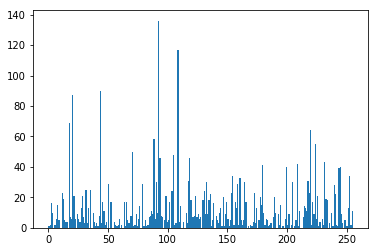

In [171]:
test = desc_tr[0][4]

result = codebook.predict( test.T )

plt.hist( result, bins = range( 0, 256 ) )
plt.show()

In [240]:
test

(3363, 128)

In [172]:
hist = np.histogram( result, bins = range( 0, 256 ) )

hist[ 0 ].shape

(255,)

In [173]:
class_0 = desc_tr[ 3 ]

avg_hist = []

for image in class_0:
    
    result = codebook.predict( image.T )
    avg_hist.append( np.histogram( result, bins = 256 )[ 0 ] )
    
avg_hist = np.asarray( avg_hist )
avg_hist = avg_hist.mean(axis = 0)

<BarContainer object of 256 artists>

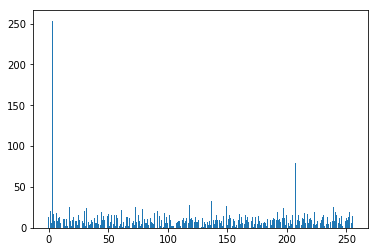

In [174]:
plt.bar( range( 0, 256 ), avg_hist )

# Utility Functions

In [337]:
def vq_data( data, codebook, vocab_size ):
    
    train_vq = []
    
    for image in data:
        image = image.T

        image_vq = codebook.predict( image )
        image_vq = np.histogram( image_vq, bins = vocab_size )[ 0 ]

        train_vq.append( image_vq )

    train_vq = np.asarray( train_vq )
    
    return train_vq

___
# Question 1

## Train Images

In [211]:
desc_tr = mat_file[ 'desc_tr' ]

print( desc_tr.shape )

label_tr = np.asarray( [i for i in range(1,11) for x in range(15)] )

label_tr.shape

(10, 15)


(150,)

In [233]:
train = desc_tr.reshape( 150 )

train[ 0 ].T.shape

(3363, 128)

## Test Images

In [208]:
desc_te = mat_file[ 'desc_te' ]

print( desc_tr.shape )

label_te = [ [i for _ in range( 15 ) ] for i in range( 1, 11 ) ]

(10, 15)


## Vary Vocabulary Size

In [291]:
random_state = 0
img_index    = 60

### Size 2

In [338]:
vocab_size = 2
codebook_2 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

In [339]:
train_vq_2 = vq_data( train, codebook_2, 2 )
print( train_vq_2.shape )

(150, 2)


### Size 16

In [179]:
vocab_size  = 16
codebook_16 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

In [274]:
train_vq_16 = vq_data( train, codebook_16, 16 )
print( train_vq_16.shape )

(150, 16)


### Size 64

In [181]:
vocab_size  = 64
codebook_64 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

In [275]:
train_vq_64 = vq_data( train, codebook_64, 64 )
print( train_vq_64.shape )

(150, 64)


### Size 128

In [182]:
vocab_size   = 128
codebook_128 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

In [276]:
train_vq_128 = vq_data( train, codebook_128, 128 )
print( train_vq_128.shape )

(150, 128)


## Size 256

In [297]:
vocab_size   = 256
codebook_256 = KMeans( n_clusters = vocab_size, random_state = random_state ).fit( desc_sel )

In [298]:
train_vq_256 = vq_data( train, codebook_256, 256 )
print( train_vq_256.shape )

(150, 256)


## Histograms

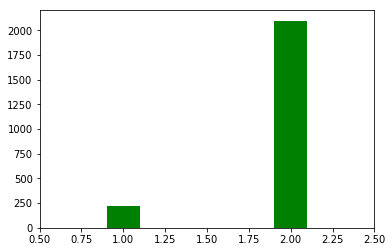

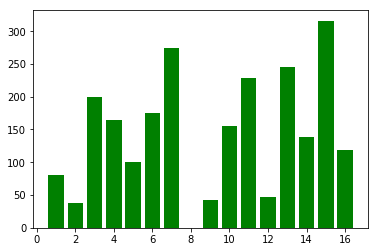

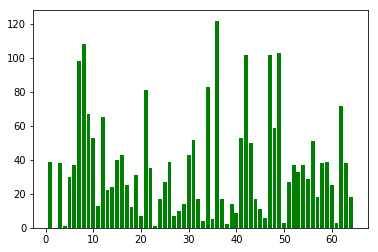

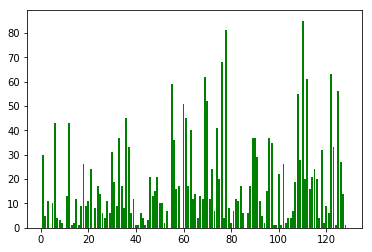

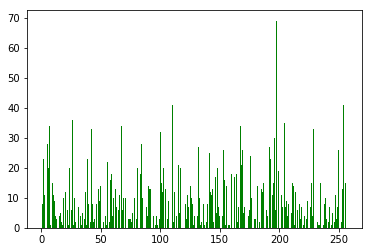

In [347]:
col = 'green'

fig1 = plt.figure()
plt.xlim( 0.5, 2.5 )
plt.bar( [1, 2], train_vq_2[ img_index ], color = col, width = 0.2 )
# plt.hist( train_vq_2[ img_index ], bins = 'auto' )

fig2 = plt.figure()
plt.bar( range( 1, 17 ), train_vq_16[ img_index ], color = col )

fig3 = plt.figure()
plt.bar( range( 1, 65 ), train_vq_64[ img_index ], color = col )

fig4 = plt.figure()
plt.bar( range( 1, 129 ), train_vq_128[ img_index ], color = col )

fig5 = plt.figure()
plt.bar( range( 1, 257 ), train_vq_256[ img_index ], color = col )

plt.show()